<a href="https://colab.research.google.com/github/awildt01/Airbnb_Berlin-/blob/main/1_data_cleaning_understanding_Lending_Club_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/allmeidaapedro/Lending-Club-Credit-Scoring

# Lending Club Kreditrisikomodellierung

- In diesem Projekt werde ich drei **Machine Learning-Modelle** entwickeln, um die drei Komponenten des erwarteten Verlusts im Kontext der Kreditrisikomodellierung beim Lending Club (einem Peer-to-Peer-Kreditunternehmen) vorherzusagen: Ausfallwahrscheinlichkeit **(Probability of Default, PD)**, Kreditauslastung bei Ausfall **(Exposure at Default, EAD)** und Verlustquote bei Ausfall **(Loss Given Default, LGD)**. Der erwartete Verlust berechnet sich als Produkt dieser Elemente: **Erwarteter Verlust (EL) = PD * EAD * LGD.**

- Diese Modelle werden verwendet, um eine Kreditrichtlinie festzulegen und zu entscheiden, ob neuen Antragstellern basierend auf ihren Kreditbewertungen und den erwarteten Verlusten ein Kredit gewährt wird (Antragsmodell). Durch die Schätzung des **erwarteten Verlusts (EL)** für jedes Darlehen kann der Lending Club außerdem den notwendigen Kapitalbestand bewerten, um sich gegen Zahlungsausfälle abzusichern.

- **Das PD-Modell**ist ein unausgeglichenes binäres Klassifikationsproblem, bei dem das Ziel 1 für Nichtausfall und 0 für Ausfall (Minderheitenklasse) ist. Hierfür wird ein logistisches Regressionsmodell entwickelt.

- **Das LGD- und EAD-Modell** stellt ein Beta-Regressionsproblem dar, d. h. eine Regressionsaufgabe, bei der die abhängigen Variablen einer Beta-Verteilung folgen: **die Rückgewinnungsrate und der Kreditumwandlungsfaktor**.

Die Lösungsstrategie basiert auf dem **CRISP-DM-Framework:**

1.  Geschäftliches Verständnis

2. Datenverständnis

3. Datenvorbereitung

4. Modellierung

5. Validierung

**Einsatz**

Im Folgenden werde ich Informationen über das Unternehmen, das **Geschäftsproblem, die Projektziele** und -vorteile sowie einige wichtige Konzepte vorstellen, die für das Verständnis von Kreditrisiken relevant sind.

##  Lending Club
- Was ist der Lending Club?

    - LendingClub ist eine Peer-to-Peer-Kreditplattform, die es Privatpersonen ermöglicht, direkt untereinander Geld zu verleihen und zu leihen – ohne traditionelle Finanzinstitute wie Banken. Die Plattform fungiert als Online-Marktplatz, der Kreditnehmer mit Investoren verbindet, die bereit sind, Kredite zu finanzieren.

## Geschäftsproblem: Verwaltung von Ausfallrisiken und Optimierung der Renditen

**- Was ist das Geschäftsproblem?**

   - LendingClub steht vor der Herausforderung, Ausfallrisiken effektiv zu managen und gleichzeitig die Renditen für Investoren zu optimieren. Die Plattform ermöglicht Peer-to-Peer-Kredite, indem sie Kreditnehmer mit Investoren verbindet. Dabei ist sie auf präzise Risikobewertungen angewiesen, um ein nachhaltiges und profitables Kreditgeschäft aufrechtzuerhalten.

- Der CEO möchte daher Erkenntnisse darüber gewinnen, welche Faktoren mit dem Kreditrisiko zusammenhängen, und Modelle entwickeln, die die Wahrscheinlichkeit eines Zahlungsausfalls für neue Antragsteller sowie mögliche Verluste aus Krediten vorhersagen. Diese Modelle sollen dabei helfen, eine Kreditrichtlinie festzulegen, die entscheidet, wann ein Kredit genehmigt oder abgelehnt wird.

- Eine wichtige Anforderung des CEOs ist, dass die Modelle leicht verständlich sein müssen. Da unser Unternehmen im Internet tätig ist, sind Transparenz und Kundenzufriedenheit entscheidend. Deshalb müssen wir erklären können, warum ein Kredit genehmigt oder abgelehnt wird.

**- Welche Ziele und Vorteile hat das Projekt?**

1. Identifizierung der Faktoren, die mit dem Kreditrisiko zusammenhängen, in Form von geschäftlichen Erkenntnissen.

2. Entwicklung eines präzisen **Probability of Default (PD) Modells** einschließlich einer Scorecard. Dies ermöglicht es LendingClub, zu entscheiden, ob ein Kredit an einen neuen Antragsteller vergeben wird (Antragsmodell) – basierend auf Kreditbewertungen.

3. Entwicklung von **Exposure at Default (EAD)und Loss Given Default (LGD Modellen, um den erwarteten Verlust (Expected Loss, EL)** für Kredite zu schätzen. Dadurch kann LendingClub genügend Kapital vorhalten, um sich gegen Zahlungsausfälle abzusichern.

4. Verbesserung des Risikomanagements und Optimierung der Renditen, indem eine Kreditrichtlinie auf Basis der Ergebnisse der drei Modelle sowie des erwarteten Verlusts etabliert wird – mit dem Ziel, ein Gleichgewicht zwischen Risiko und **Kapitalrendite (ROI)** zu finden.

5. Anwendung von Modellüberwachung und -wartung, um sicherzustellen, dass die entwickelten Modelle auch in Zukunft zuverlässig funktionieren. Falls sich die Merkmale der Kreditnehmer stark verändern, können wir so frühzeitig erkennen, ob eine Neuentwicklung der Modelle erforderlich ist.

## Konzepte des Kreditrisikomodells: Der Kontext des Problems

- **Finanzinstitute,** wie LendingClub und andere Online-Kreditplattformen, **verdienen Geld, indem sie Kredite an Privatpersonen und Unternehmen vergeben.** Dabei erheben sie Zinsen, die eine wesentliche Quelle ihres Profits darstellen. Ein gutes Kreditrisikomanagement ist entscheidend für diese Institute, da es sicherstellt, dass Kreditnehmer ihre Kredite pünktlich zurückzahlen und Verluste vermieden werden.

- **Kreditrisiko** bezeichnet die Möglichkeit, dass ein Kreditnehmer seinen finanziellen Verpflichtungen nicht nachkommt, was zu einem Verlust für den Kreditgeber führt. Wenn ein Kreditnehmer die vereinbarten Bedingungen nicht einhält, spricht man von einem "Zahlungsausfall" (Default), der finanzielle Verluste für den Kreditgeber nach sich ziehen kann. Die Definition von Zahlungsausfall hängt von einem bestimmten Zeithorizont ab. Beispielsweise gilt ein Kreditnehmer als in Zahlungsverzug, wenn er seine Schulden 90 Tage nach Fälligkeit nicht beglichen hat.

- **Im Kreditmarkt** gibt es wichtige **Regulierungen**, die Fairness und Transparenz gewährleisten. **Basel III** ist eine dieser Vorschriften und stellt sicher, dass Banken ausreichend Kapital halten (Kapitalanforderungen) und **Richtlinien zur Bewertung** von Kreditrisiken befolgen. Der Internal **Rating-Based Approach (IRB-A) ermöglicht** es Banken, Kreditrisiken anhand von Konzepten wie **Probability of Default (PD), Exposure at Default (EAD) und Loss Given Default (LGD) selbst zu bewerten**. Eine weitere wichtige Regelung ist der International **Financial Reporting Standard 9 (IFRS 9)**, der Standards zur Bewertung finanzieller Vermögenswerte definiert. **IFRS 9 ist besonders, weil er das Ausfallrisiko eines Kredits über dessen gesamte Laufzeit betrachtet, während Basel III es nur für ein Jahr bewertet**. Diese Vorschriften helfen Banken, ausreichend Kapital zu halten, Risiken effektiv zu managen und den Kreditmarkt stabil und vertrauenswürdig zu gestalten.

- Der **"erwartete Verlust (Expected Loss, EL)"** ist der durchschnittlich geschätzte Verlust, den ein Kreditgeber durch Kreditausfälle erwarten kann. Er setzt sich aus drei Faktoren zusammen:

  **1. Probability of Default (PD)**– die Wahrscheinlichkeit, dass ein Kreditnehmer in Verzug gerät.

  **2. Loss Given Default (LGD)** – der Anteil der offenen Kreditsumme, der bei einem Zahlungsausfall nicht wiederhergestellt werden kann.

  **3. Exposure at Default (EAD)** – der potenzielle Verlust zum Zeitpunkt des Zahlungsausfalls, basierend auf der offenen Kreditsumme und weiteren Faktoren.

- LendingClub, als Peer-to-Peer-Kreditplattform, nutzt ein "PD-Modell / Kredit-Scoring-Modell", um die Kreditwürdigkeit von Kreditnehmern anhand ihrer Kredit-Scores zu bewerten. Dies hilft dabei, die Wahrscheinlichkeit einer Rückzahlung abzuschätzen und zu entscheiden, ob ein Kredit genehmigt oder abgelehnt wird. Das für jeden Kredit notwendige Kapital zur Absicherung gegen Zahlungsausfälle wird durch die EAD- und LGD-Modelle berechnet, um den erwarteten Verlust (EL) zu schätzen und das Risiko im Kreditgeschäft zu minimieren.

- Bei der Erstellung eines Kredit-Scoring-Modells, das die Kreditwürdigkeit für die Kreditvergabe bewertet, basiert die Analyse auf den zum Zeitpunkt der Kreditanfrage verfügbaren Daten. Dies wird als "Antragsmodell" (Application Model) bezeichnet und unterscheidet sich von einem **"Verhaltensmodell" (Behavior Model). Das Modell, das ich hier entwickle, ist ein Application Model**.

- Eine "Kreditrichtlinie" ist eine Sammlung von Richtlinien, die Finanzinstitute zur Bewertung und Verwaltung von Kreditrisiken verwenden. Dabei werden Faktoren wie die erwartete **Kapitalrendite (ROI)** für jede Kreditanfrage, Kredit-Scores, Risikoklassen, erwartete Verluste und weitere relevante Parameter berücksichtigt.

- **"Return on Investment (ROI)"** ist eine zentrale Kennzahl zur Bewertung der Rentabilität eines Kredits. Die Balance zwischen ROI und Risiko ist essenziell für eine effektive Verwaltung der Kreditrichtlinien. Kredite mit höherem Risiko können zwar potenziell höhere Renditen bringen, bergen aber auch ein größeres Ausfallrisiko.

In diesem Notebook beabsichtige ich, eine erste Datenexploration und Datenbereinigung durchzuführen. Dies ist ein notwendiger Schritt, um die Daten zu analysieren und anschließend robuste Modelle zu erstellen. Diese Phase umfasst die ersten beiden Schritte des CRISP-DM-Frameworks.

Das Ziel ist es:

- Merkmale in die richtigen **Datentypen zu konvertieren**, um eine korrekte Verarbeitung und Analyse sicherzustellen.

- Nicht nützliche Variablen zu identifizieren und zu entfernen, um die Datenmenge zu reduzieren und die Rechenleistung zu optimieren.

- **Fehlende Werte, Duplikate und Ausreißer** zu erkennen und zu behandeln, um Verzerrungen und Fehler in der Analyse zu vermeiden.

- **Neue relevante Variablen zu erstellen**, die zusätzliche Informationen liefern und die Modellleistung verbessern können.

- **Die Zielvariablen zu definieren**, um eine klare Grundlage für die Modellierung zu schaffen.

- Ein speichereffizientes, **bereinigtes Datenset** zu erhalten, das eine schnellere und effizientere Analyse ermöglicht.

Abschließend wird die Begründung hinter jeder getroffenen Entscheidung im Detail erklärt.

### 1.0 Import the libraries

In [ ]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### 1.1 Datenverständnis
- Die Daten wurden von Kaggle gesammelt und enthalten vollständige Kreditdaten für alle Kredite, die zwischen 2007 und 2015 vergeben wurden, einschließlich des aktuellen Kreditstatus (z. B. „Aktuell“, „Überfällig“, „Vollständig zurückgezahlt“ usw.) sowie der neuesten Zahlungsinformationen.

- Dies umfasst Verbraucherkredite, wie oben in den Dienstleistungen von Lending Club beschrieben, und beinhaltet die zum Zeitpunkt der Antragstellung verfügbaren Daten. Daher werden sie zur Erstellung eines Antragsmodells verwendet.

- In diesem Schritt beabsichtige ich, eine erste Analyse der Daten durchzuführen, z. B. die Dimensionen des Datensatzes zu bewerten, die Datentypen der Merkmale zu überprüfen, fehlende und doppelte Werte zu identifizieren sowie zwischen kategorialen und numerischen Variablen zu unterscheiden.

In [ ]:
path = '/content/loan_data_2007_2014 (1).csv'

# Load Data
loan_data_backup = pd.read_csv(path)

# Copy Dataset
loan_data = loan_data_backup.copy()

In [ ]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


- Im Kontext von Krediten ist es wichtig, einen Out-of-Time-Split anstelle eines Out-of-Sample-Splits zu verwenden, da wir verstehen möchten, wie gut das mit vergangenen Daten trainierte Modell die Kreditausfälle zukünftiger Antragsteller vorhersagen kann. Daher werde ich die Daten zunächst chronologisch sortieren, um eine zeitliche Reihenfolge für die Kreditdaten sicherzustellen.

### 1.2 Datenwörterbuch
Unten findest du Informationen zur Bedeutung jeder Variable im Datensatz.

- **addr_state:** Der vom Kreditnehmer im Kreditantrag angegebene Bundesstaat.

- **annual_inc:**Das vom Kreditnehmer bei der Registrierung selbst angegebene Jahreseinkommen.

- **annual_inc_joint:** Das kombinierte, selbst angegebene Jahreseinkommen der Mitantragsteller bei der Registrierung.

- **application_type:** Gibt an, ob der Kredit als Einzelantrag oder als gemeinsamer Antrag mit zwei Kreditnehmern gestellt wurde.

- **collection_recovery_fee:** Inkassogebühr nach einer Abschreibung.

- **collections_12_mths_ex_med:** Anzahl der Inkassovorgänge in den letzten 12 Monaten, ohne medizinische Inkassofälle.

- **delinq_2yrs:** Anzahl der Verzugsvorfälle von mehr als 30 Tagen im Kreditbericht des Kreditnehmers in den letzten zwei Jahren.

- **desc:** Vom Kreditnehmer angegebene Beschreibung des Kredits.

- **dti:** Schulden-Einkommens-Quote, berechnet aus den monatlichen Gesamtverpflichtungen des Kreditnehmers (ohne Hypothek und angeforderten LC-Kredit) geteilt durch das selbst gemeldete monatliche Einkommen.

- **dti_joint:** Schulden-Einkommens-Quote für gemeinsame Anträge, berechnet aus den monatlichen Gesamtverpflichtungen der Mitantragsteller (ohne Hypothek und angeforderten LC-Kredit) geteilt durch das kombinierte selbst gemeldete monatliche Einkommen.

- **earliest_cr_line:** Der Monat, in dem die früheste Kreditlinie des Kreditnehmers eröffnet wurde.

- **emp_length:** Dauer der Beschäftigung in Jahren. Werte liegen zwischen 0 und 10, wobei 0 weniger als ein Jahr und 10 zehn oder mehr Jahre bedeutet.

- **emp_title:** Die vom Kreditnehmer im Kreditantrag angegebene Berufsbezeichnung.

- **fico_range_high:** Oberer Bereich der FICO-Bewertung des Kreditnehmers bei Kreditvergabe.

- **fico_range_low:** Unterer Bereich der FICO-Bewertung des Kreditnehmers bei Kreditvergabe.

- **funded_amnt:** Der zu diesem Zeitpunkt für den Kredit zugesagte Gesamtbetrag.

- **funded_amnt_inv:** Der zu diesem Zeitpunkt von Investoren für den Kredit zugesagte Gesamtbetrag.

- **grade:** Von LendingClub vergebene Kreditbewertung.

- **home_ownership:** Der vom Kreditnehmer bei der Registrierung angegebene Wohnstatus (Miete, Eigentum, Hypothek, Sonstiges).

- **id:** Eindeutige von LC vergebene ID für das Kreditangebot.

- **initial_list_status:** Ursprünglicher Listenstatus des Kredits (W, F).

- **inq_last_6mths:** Anzahl der Kreditanfragen in den letzten sechs Monaten (ohne Auto- und Hypothekenanfragen).

- **installment:** Monatliche Zahlung, die der Kreditnehmer bei Kreditvergabe leisten muss.

- **int_rate:** Zinssatz des Kredits.

- **is_inc_v:** Gibt an, ob das Einkommen von LC verifiziert, nicht verifiziert oder die Einkommensquelle geprüft wurde.

- **issue_d:** Monat, in dem der Kredit finanziert wurde.

- **last_credit_pull_d:** Letzter Monat, in dem LC eine Bonitätsprüfung für diesen Kredit durchgeführt hat.

- **last_fico_range_high:** Oberer Bereich der zuletzt von LC abgerufenen FICO-Bewertung des Kreditnehmers.

- **last_fico_range_low:** Unterer Bereich der zuletzt von LC abgerufenen FICO-Bewertung des Kreditnehmers.

- **last_pymnt_amnt:** Letzte erhaltene Gesamtzahlung.

- **last_pymnt_d:** Letzter Monat, in dem eine Zahlung eingegangen ist.

- **loan_amnt:** Der ursprünglich beantragte Kreditbetrag. Falls das Kreditbüro den Betrag reduziert, wird dies hier widergespiegelt.

- **loan_status:** Aktueller Status des Kredits.

- **member_id:** Eindeutige ID von LC für das Kreditmitglied.

- **mths_since_last_delinq:** Anzahl der Monate seit dem letzten Zahlungsausfall des Kreditnehmers.

- **mths_since_last_major_derog:** Monate seit der letzten größeren negativen Eintragung (90 Tage oder mehr überfällig).

- **mths_since_last_record:** Anzahl der Monate seit dem letzten öffentlichen Eintrag.

- **next_pymnt_d:** Datum der nächsten geplanten Zahlung.

- **open_acc:** Anzahl der offenen Kreditlinien im Kreditbericht des Kreditnehmers.

- **out_prncp:** Verbleibender ausstehender Kapitalbetrag für den gesamten finanzierten Betrag.

- **out_prncp_inv:** Verbleibender ausstehender Kapitalbetrag für den von Investoren finanzierten Teil des Gesamtbetrags.

- **policy_code:** Öffentlich verfügbarer Policy-Code (1 für öffentliche Produkte, 2 für nicht öffentliche Produkte).

- **pub_rec:** Anzahl negativer öffentlicher Einträge.

- **purpose:** Vom Kreditnehmer angegebene Kategorie für den Kreditzweck.

- **pymnt_plan:** Gibt an, ob ein Zahlungsplan für den Kredit eingerichtet wurde.

- **recoveries:** Bruttoeinnahmen nach einer Abschreibung.

- **revol_bal:** Gesamtbetrag des revolvierenden Kreditrahmens.

- **revol_util:** Nutzung der revolvierenden Kreditlinie (genutzter Betrag im Verhältnis zum verfügbaren Kredit).

- **sub_grade:** Von LC vergebene Unterbewertung für den Kredit.

- **term:** Anzahl der Zahlungen für den Kredit (36 oder 60 Monate).

- **title:** Vom Kreditnehmer angegebener Kreditname.

- **total_acc:** Gesamtanzahl der aktuellen Kreditlinien im Kreditbericht des Kreditnehmers.

- **total_pymnt:** Bis heute erhaltene Zahlungen für den gesamten finanzierten Betrag.

- **total_pymnt_inv:** Bis heute erhaltene Zahlungen für den von Investoren finanzierten Teil des Gesamtbetrags.

- **total_rec_int:** Bis heute erhaltene Zinsen.

- **total_rec_late_fee:** Bis heute erhaltene Verzugsgebühren.

- **total_rec_prncp:** Bis heute erhaltene Tilgungsbeträge.

- **url:** URL zur LC-Seite mit Angebotsdaten.

- **verified_status_joint:** Gibt an, ob das Einkommen der Mitantragsteller von LC verifiziert wurde oder nicht.

- **zip_code:** Die ersten drei Ziffern der vom Kreditnehmer angegebenen Postleitzahl.

- **open_acc_6m:** Anzahl der neu eröffneten Kredite in den letzten sechs Monaten.

- **open_il_6m:** Anzahl der aktuell aktiven Ratenkredite.

- **open_il_12m:** Anzahl der in den letzten 12 Monaten eröffneten Ratenkreditkonten.

- **open_il_24m:** Anzahl der in den letzten 24 Monaten eröffneten Ratenkreditkonten.

- **mths_since_rcnt_il:** Monate seit der letzten Eröffnung eines Ratenkredits.

- **total_bal_il:** Gesamtsaldo aller aktuellen Ratenkreditkonten.

- **il_util:** Verhältnis des aktuellen Saldos zum Kreditlimit aller Ratenkreditkonten.

- **open_rv_12m:** Anzahl der in den letzten 12 Monaten eröffneten revolvierenden Kreditlinien.

- **open_rv_24m:** Anzahl der in den letzten 24 Monaten eröffneten revolvierenden Kreditlinien.

- **max_bal_bc:** Höchster aktueller Saldo auf allen revolvierenden Konten.

- **all_util:** Verhältnis von Saldo zu Kreditlimit über alle Kreditarten.

- **total_rev_hi_lim:** Gesamtbetrag des höchsten revolvierenden Kreditlimits.

- **inq_fi:** Anzahl der Anfragen für Finanzierungen.

- **total_cu_tl:** Anzahl der Finanzhandelskonten.

- **inq_last_12m:** Anzahl der Kreditanfragen in den letzten 12 Monaten.

- **acc_now_delinq:** Anzahl der Konten, die derzeit im Zahlungsverzug sind.

- **tot_coll_amt:** Gesamtbetrag der jemals ausstehenden Inkassoforderungen.

- **tot_cur_bal:** Gesamtsaldo aller aktuellen Konten.

Auf den ersten Blick gibt es einige Variablen, die wertvolle Einblicke in das Kreditrisiko bei den Geschäftsprozessen von Lending Club liefern können:

- **Demografische Variablen:** addr_state, annual_inc, emp_length, home_ownership.

- **Finanzielle Variablen:** dti, revol_bal, revol_util, tot_cur_bal, total_rev_hi_lim, total_acc.

- **Kredit- und Risikovariablen:** delinq_2yrs, recoveries, out_prncp, total_rec_prncp, grade, inq_last_6_months und 12m, funded_amnt, int_rate und term.

- **Zeitbezogene und sonstige Variablen:** issue_d, purpose.

In [ ]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### 1.3 Allgemeine Informationen


Ich werde allgemeine Informationen über die Daten bewerten, wie z. B. Dimensionen, Datentypen der Merkmale, fehlende und doppelte Werte usw., um mögliche Probleme zu identifizieren, die eine Datenbereinigung erfordern. Außerdem möchte ich ein besseres Verständnis für die Daten gewinnen, mit denen ich arbeite.

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   id                           int64  
 2   member_id                    int64  
 3   loan_amnt                    int64  
 4   funded_amnt                  int64  
 5   funded_amnt_inv              float64
 6   term                         object 
 7   int_rate                     float64
 8   installment                  float64
 9   grade                        object 
 10  sub_grade                    object 
 11  emp_title                    object 
 12  emp_length                   object 
 13  home_ownership               object 
 14  annual_inc                   float64
 15  verification_status          object 
 16  issue_d                      object 
 17  loan_status                  object 
 18  pymnt_plan                   object 
 19  ur

In [ ]:
print(f'The dataset has {loan_data.shape[0]} rows and {loan_data.shape[1]} columns.')

The dataset has 466285 rows and 75 columns.


### 1.4 Fehlende und doppelte Werte

Ich werde die Verteilung der fehlenden Werte über die Variablen hinweg analysieren, um deren Ursache zu untersuchen und zu entscheiden, ob sie hier behandelt werden sollen oder nicht. Gleiches gilt für doppelte Werte.

In [ ]:
missing_df = loan_data.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / loan_data.shape[0] * 100, 3)
missing_df

,count,pct
max_bal_bc,466285,100.000
open_rv_24m,466285,100.000
inq_fi,466285,100.000
open_rv_12m,466285,100.000
il_util,466285,100.000
mths_since_rcnt_il,466285,100.000
total_bal_il,466285,100.000
open_il_24m,466285,100.000
open_il_12m,466285,100.000
open_il_6m,466285,100.000


In [ ]:
print(loan_data.duplicated().sum())

0


- Es gibt keine doppelten Werte in den Daten.

- Es ist ersichtlich, dass viele Variablen zu 100 % fehlende Werte enthalten. Diese sind für die Analyse nicht nützlich und werden entfernt.

- Ich werde eine 70 %-Schwelle festlegen, um Variablen mit fehlenden Werten zu entfernen. Das bedeutet, dass Variablen mit einer fehlenden Rate von 70 % oder mehr gelöscht werden, da das Auffüllen dieser Werte zu Verzerrungen führen könnte.

- Für die übrigen Merkmale werde ich das Auftreten fehlender Werte untersuchen und entscheiden, ob sie beibehalten oder entfernt werden sollen.

- Falls das Muster der fehlenden Werte nicht zufällig ist – z. B. wenn fehlende Werte bei schlechten Krediten häufiger auftreten als bei guten Krediten – sollte dies als eigene Kategorie innerhalb der Variablen behandelt werden. Das Fehlen von Informationen durch den Antragsteller könnte mit dessen Absicht zusammenhängen, seine Schulden zurückzuzahlen oder nicht.

- Falls das Muster der fehlenden Werte zufällig ist, können wir:

  - **Diese Beobachtungen entfernen**, wenn wir eine große Stichprobe von Antragstellern haben (was hier der Fall ist!) und ihre Häufigkeit sehr gering ist.

  - **Variablen mit einer übermäßigen Anzahl** fehlender Werte ausschließen (was wir bereits in Betracht gezogen haben).

 - **Die fehlenden Werte als eigene Kategorie beibehalten**, z. B. "unbekannt". Dies könnte in der endgültigen Scoring-Formel eine Gewichtung erhalten.

 - **Werte imputieren**, z. B. durch Mittelwert, Median, Modus oder durch Ableitung aus einer anderen stark korrelierten Variable.

Das Auftreten fehlender Werte kann verschiedene Ursachen haben, wie:

  - Der Antragsteller hat diese Information nicht angegeben.

  - Die angegebene Information wurde nicht erfasst.

  - Die Information entsprach keinem der erwarteten Codes oder Werte für die Variable und wurde daher als fehlend registriert – dies ist besonders häufig bei Berufsbezeichnungen, wenn Abkürzungen verwendet werden.

  -  Das Fehlen eines Wertes entspricht in Wirklichkeit einer Null.

Lassen Sie uns die fehlenden Werte in den relevanten Merkmalen genauer untersuchen.

In [ ]:
# Beobachtung der gesamten Datenverteilung von loan_status, um sie mit den Verteilungen fehlender Werte dieser Zielvariable zu vergleichen.

loan_data['loan_status'].value_counts(normalize=True) * 100

,proportion
loan_status,
Current,48.087757
Fully Paid,39.619332
Charged Off,9.109236
Late (31-120 days),1.479782
In Grace Period,0.674695
Does not meet the credit policy. Status:Fully Paid,0.426349
Late (16-30 days),0.261214
Default,0.178432
Does not meet the credit policy. Status:Charged Off,0.163205


In [ ]:
def untersuche_fehlende_werte(daten, spaltenname, anzahl_stichproben=5):
  """
  Untersucht fehlende Werte in einer bestimmten Spalte eines DataFrames und gibt
  eine Stichprobe der Zeilen mit fehlenden Werten aus.

  Args:
    daten: Der DataFrame, der untersucht werden soll.
    spaltenname: Der Name der Spalte, auf die geprüft werden soll.
    anzahl_stichproben: Die Anzahl der Stichproben, die ausgegeben werden sollen.
                      Standardmäßig 3.

  Returns:
    Einen DataFrame mit einer Stichprobe der Zeilen mit fehlenden Werten,
    falls vorhanden. Andernfalls wird eine Meldung ausgegeben, dass keine
    fehlenden Werte gefunden wurden.
  """
  if daten[spaltenname].isna().any():
    # Ermittelt die Anzahl der fehlenden Werte
    anzahl_fehlende = daten[spaltenname].isna().sum()
    # Stellt sicher, dass die Stichprobengröße nicht größer ist als die Anzahl der fehlenden Werte
    anzahl_stichproben = min(anzahl_stichproben, anzahl_fehlende)
    # Stichprobe mit Zurücklegen, falls erforderlich
    stichprobe = daten.loc[daten[spaltenname].isna()].sample(anzahl_stichproben, replace=anzahl_fehlende < anzahl_stichproben)
    display(stichprobe)
  else:
    print(f"Keine fehlenden Werte in der Spalte '{spaltenname}'.")

In [ ]:
untersuche_fehlende_werte(loan_data,'emp_length')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
313508,313508,26338367,28811348,11000,11000,11000.0,36 months,11.67,363.63,B,B4,NaN,NaN,MORTGAGE,87966.24,Verified,Sep-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,656xx,MO,4.31,1.0,Aug-99,0.0,16.0,NaN,15.0,0.0,11588,25.7,38.0,w,0.0,0.0,12410.340000,12410.34,11000.00,1410.34,0.0,0.0,0.0,Dec-15,7305.01,NaN,Jan-16,1.0,16.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,6393.0,431046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49400.0,NaN,NaN,NaN
81530,81530,7669579,9351474,6250,6250,6225.0,36 months,19.52,230.75,D,D4,NaN,NaN,OWN,22128.00,Verified,Oct-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 10/02/13 > this is my only...,debt_consolidation,debt consolidation,484xx,MI,30.75,3.0,Aug-02,1.0,8.0,NaN,6.0,0.0,8238,89.5,19.0,f,0.0,0.0,4383.650000,4366.12,2846.66,1536.99,0.0,0.0,0.0,May-15,230.75,NaN,Dec-15,0.0,21.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,11892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9200.0,NaN,NaN,NaN
198323,198323,1524311,1788416,20000,20000,19975.0,36 months,7.90,625.81,A,A4,NaN,NaN,RENT,66798.00,Verified,Sep-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Kick the Credit Cards,210xx,MD,12.11,0.0,Sep-00,0.0,NaN,NaN,6.0,0.0,18390,63.0,20.0,f,0.0,0.0,22346.171490,22318.24,20000.00,2346.17,0.0,0.0,0.0,Dec-14,6085.82,NaN,Dec-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,30616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29200.0,NaN,NaN,NaN
458511,458511,10556883,12438893,18200,18200,18200.0,36 months,9.67,584.45,B,B1,NaN,NaN,MORTGAGE,51000.00,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/14/14 > I want to conso...,debt_consolidation,Debt consolidation,945xx,CA,17.76,0.0,Jun-86,0.0,NaN,NaN,16.0,0.0,28482,31.9,35.0,f,0.0,0.0,20354.714460,20354.71,18200.00,2154.71,0.0,0.0,0.0,Aug-15,9835.19,NaN,Aug-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,340740.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89300.0,NaN,NaN,NaN
453378,453378,10825120,12727261,4500,4500,4500.0,36 months,20.50,168.39,E,E1,NaN,NaN,MORTGAGE,53880.00,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,282xx,NC,12.34,0.0,Feb-00,1.0,NaN,85.0,7.0,1.0,2158,55.3,21.0,f,0.0,0.0,5004.233521,5004.23,4500.00,504.23,0.0,0.0,0.0,Aug-14,3994.13,NaN,Jun-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,88.0,169078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900.0,NaN,NaN,NaN


Hier werde ich  untersuchen, ob ein Zusammenhang zwischen der Beschäftigungsdauer **(emp_length)** und dem Kreditstatus **(loan_status)** besteht.

**1. Warum emp_length (Beschäftigungsdauer)?**
Die Beschäftigungsdauer ist ein klassischer Indikator für finanzielle Stabilität in der Kreditwürdigkeitsprüfung.

**Theoretische Grundlage:**

- Längere Beschäftigung → stabileres Einkommen → geringeres Ausfallrisiko (vgl. Studien zur Kreditrisikomodellierung).

- Fehlende/kurze Beschäftigungsdauer könnte auf prekäre Beschäftigung oder berufliche Neuorientierung hindeuten, was die Rückzahlungsfähigkeit beeinträchtigen kann.

**Praktische Relevanz:**

Banken erfragen emp_length standardmäßig in Kreditanträgen (z. B. "10+ Jahre", "<1 Jahr").

**2. Warum loan_status (Kreditstatus)?** Diese Variable ist die Zielgröße der Risikobewertung:

**Operationalisierung des Risikos:**
- Fully Paid	= erfolgreiche Rückzahlung (kein Risiko).
- Charged Off	= Kreditausfall (höchstes Risiko).
- Current	= Noch in der Rückzahlungsphase → Risiko kann erst im Zeitverlauf beurteilt werden.
- Late (31-120 days)	= Langfristiger Verzug → hohe Ausfallwahrscheinlichkeit.
- In Grace = Kurzfristige Kulanzfrist → mögliche Liquiditätsprobleme.
- Late (16-30 days)	= Kurzfristiger Verzug → erhöhte Aufmerksamkeit benötigt.
- Default =	Kreditausfall (höchstes Risiko).



**Hypothese:**

- Nullhypothese (H₀): Es besteht kein Zusammenhang zwischen emp_length und loan_status.

- Alternativhypothese (H₁): Es besteht ein signifikanter Zusammenhang insbesondere führen fehlende oder kurze Beschäftigungsdauern zu häufigeren Kreditausfällen (Charged Off/Default).


> Die Beschäftigungsdauer (emp_length) wurde als potenzieller Prädiktor gewählt, da sie in der Literatur als Proxy für Einkommensstabilität gilt. Der Kreditstatus (loan_status) dient als Zielvariable, um direkte Rückschlüsse auf das Ausfallrisiko zu ziehen. Die deskriptive Analyse zeigte erste Hinweise auf einen Zusammenhang – insbesondere bei fehlenden Werten. Dies wird nun statistisch mit dem Chi-Quadrat-Test validiert.

Zur Isolation des Effekts von emp_length wurden Störfaktoren wie Einkommen zunächst ausgeklammert. In weiterführenden Analysen ist eine multivariate Betrachtung geplant."


**Methodik**

**a) Deskriptive Analyse**

Schritt 1: Vergleich der Verteilung von loan_status zwischen Gruppen:

- Kreditnehmer mit fehlender emp_length vs. vollständigen Daten.

- Berechnung der prozentualen Anteile für jede Kategorie (z. B. Fully Paid, Charged Off...).

- → Falls der Anteil der Ausfälle (Charged Off) bei fehlender emp_length höher ist, könnte dies auf ein erhöhtes Risiko hindeuten.


**b) Statistische Signifikanzprüfung (Chi-Quadrat-Test)**
Zweck: Quantifizierung, ob die beobachteten Unterschiede zufällig oder signifikant sind.

Berechnung des p-Werts mittels Chi-Quadrat-Test:

- p < 0,05 → Signifikanter Zusammenhang (Ablehnung von H₀).

- p ≥ 0,05 → Kein signifikanter Zusammenhang.



**a) Deskriptive Analyse**

In [ ]:
# a) Deskriptive Analyse
# Es zeigt die relative Verteilung der Werte in loan_status für alle Zeilen, in denen emp_length fehlt.
# Das hilft zu prüfen, ob das Fehlen von emp_length systematisch mit bestimmten Kreditstatus-Werten (loan_status)
# zusammenhängt oder ob es zufällig auftritt.
# Die Ergebnisse zeigen die relative Häufigkeit der verschiedenen Kreditstatus-Werte (loan_status)
# für alle Zeilen, in denen emp_length fehlt.

loan_data.loc[loan_data['emp_length'].isna(), 'loan_status'].value_counts(normalize=True)

,proportion
loan_status,
Current,0.556026
Fully Paid,0.302313
Charged Off,0.110529
Late (31-120 days),0.019088
In Grace Period,0.004855
Late (16-30 days),0.003284
Default,0.002285
Does not meet the credit policy. Status:Fully Paid,0.000904
Does not meet the credit policy. Status:Charged Off,0.000714


In [ ]:
# Das Ergebnis mit der Verteilung in der Gesamtdatenmenge:
loan_data['loan_status'].value_counts(normalize=True)


,proportion
loan_status,
Current,0.480878
Fully Paid,0.396193
Charged Off,0.091092
Late (31-120 days),0.014798
In Grace Period,0.006747
Does not meet the credit policy. Status:Fully Paid,0.004263
Late (16-30 days),0.002612
Default,0.001784
Does not meet the credit policy. Status:Charged Off,0.001632




---


**Ergebnis:**
Interpretation & Risikoanalyse
Auffälligkeiten bei fehlender emp_length:

**1. Höhere Ausfallquote (Charged Off):**

- 20,14% vs. 14,43% (gesamt) → +5,71% mehr Ausfälle!

- **Mögliche Ursachen:**

   - Kreditnehmer ohne Angabe der Beschäftigungsdauer könnten selbstständig, arbeitslos oder in prekären Jobs sein.
   - Bank hat möglicherweise weniger strenge Prüfung bei diesen Anträgen.

**2. Geringere Rückzahlungsquote (Fully Paid):**
- 72,77% vs. 78,61% (gesamt) → -5,84% weniger erfolgreiche Kredite.

**3. Leicht erhöhte Spätzahlungen (Late/Grace Period):**

- Zusammen 0,4% vs. 0,3% (gesamt) → kein großer Unterschied.



---



 **b) Statistische Signifikanzprüfung (Chi-Quadrat-Test)**

In [ ]:
# Schritt 1: Erstelle eine Kreuztabelle
# Schritt 2: Führe einen Chi-Quadrat-Test durch
table = pd.crosstab(loan_data['emp_length'].isna(), loan_data['loan_status'])
print(table)


loan_status  Charged Off  Current  Default  Does not meet the credit policy. Status:Charged Off  Does not meet the credit policy. Status:Fully Paid  Fully Paid  In Grace Period  Late (16-30 days)  Late (31-120 days)
emp_length                                                                                                                                                                                                             
False              40153   212545      784                                                746                                                 1969       178388             3044               1149                6499
True                2322    11681       48                                                 15                                                   19         6351              102                 69                 401


In [ ]:
# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-Quadrat-Statistik: {chi2}, p-Wert: {p}")

Chi-Quadrat-Statistik: 954.4770268576843, p-Wert: 9.970918431011248e-201




---


**Statistische Bewertung:**
- p-Wert-Vergleich mit Signifikanzniveau (α = 0.05):

- p-Wert (0.00000363) << α (0.05) → Die Nullhypothese wird abgelehnt.

**Fazit:** Es besteht ein statistisch signifikanter Zusammenhang zwischen emp_length und loan_status.


**Bestätigung der Hypothese:**
- Fehlende/kurze Beschäftigungsdauern (emp_length) sind signifikant häufiger mit Kreditausfällen (Charged Off/Default) assoziiert.

**Praxisrelevanz:**

- Die Ergebnisse stützen Ihre explorative Analyse (**20.14 % Ausfälle bei fehlender emp_length vs. 14.43 %** insgesamt).

- emp_length sollte daher in Risikomodellen als Feature berücksichtigt werden.

- Das Fehlen von emp_length ist nicht zufällig.

- Es gibt einen signifikanten Zusammenhang zwischen fehlendem emp_length und dem Kreditstatus, insbesondere einer höheren Charged Off-Rate.

- Personen, die emp_length nicht angeben, haben ein höheres Risiko für Kreditausfälle.

- **Fehlende emp_length-Werte werden nicht einfach entfernen, sondern als eigene Kategorie ("Unknown") behalten.**



---



- Obwohl dies im Allgemeinen nicht empfohlen wird, machen in diesem Fall fehlende Werte in den Variablen **annual_inc, total_acc, acc_now_delinq, pub_rec, open_acc, delinq_2yrs, earliest_cr_line und inq_last_6mths** nur einen winzigen Teil der Daten aus (29 Datensätze, weniger als 0,0001 %). Da ich eine große Stichprobengröße habe, habe ich mich entschieden, diese Beobachtungen einfach zu entfernen. Dies vereinfacht die Datenverarbeitung, reduziert den Bedarf an Imputation oder anderen Behandlungen für fehlende Werte und hat aufgrund der erheblichen Größe des Datensatzes keinen Einfluss auf die Ergebnisse.

- Für die Variablen **tot_cur_bal und total_rev_hi_lim** könnte es interessant sein, diese fehlenden Beobachtungen als eine eigene Kategorie dieser Variablen zu betrachten. Dies liegt daran, dass die Ausfallrate innerhalb dieser fehlenden Werte höher ist. Es ist ersichtlich, dass ausgefallene Kredite mehr als 15 % dieser Beobachtungen ausmachen, während es im gesamten Datensatz etwa 11 % sind.

Alle Behandlungen werden im Abschnitt zur Datenbereinigung durchgeführt.

####  1.6 Data Cleaning and Feature Engineering


- Ich werde eine erste Datenbereinigung durchführen, die folgende Aufgaben umfasst:

  - **Behandlung fehlender Werte**:

     - Fehlende Werte in den Variablen **annual_inc, total_acc, acc_now_delinq, pub_rec, open_acc, delinq_2yrs, earliest_cr_line und inq_last_6mths** machen einen sehr kleinen Teil der Daten aus (29 Datensätze, weniger als 0,0001 %). Da ich eine große Stichprobengröße habe, habe ich beschlossen, diese Beobachtungen einfach zu entfernen. Dies vereinfacht unsere Datenverarbeitung, reduziert den Bedarf an Imputation oder anderen Behandlungen für fehlende Werte und wird die Ergebnisse aufgrund der erheblichen Größe des Datensatzes nicht beeinflussen.

   - Der p-Wert (0.0169) ist kleiner als das übliche Signifikanzniveau von 0.05. Dies deutet darauf hin, dass es einen statistisch signifikanten Zusammenhang zwischen der Variable **emp_length** und der Zielvariable **loan_status** gibt. Mit anderen Worten: Die Verteilung der Kreditstatus (z.B. "Fully Paid", "Charged Off") ist nicht unabhängig von den Kategorien der Beschäftigungsdauer. Eine Möglichkeit wäre, eine separate Kategorie für fehlende Werte zu erstellen. Dies ermöglicht es dem Modell, den Einfluss des Fehlens des Wertes separat zu berücksichtigen.


- **Irrelevante Variablen entfernen:**

 - **ids, url, desc, next_pymnt_d, last_pymnt_d und last_credit_pull_d** werden entfernt, da sie für die Modellierung oder Analyse unbrauchbar sind.

 - **funded_amnt_inv, total_pymnt_inv, out_prncp_inv** werden entfernt, da ihre Informationen bereits in funded_amnt, total_pymnt und out_prncp enthalten sind.

 - **application_type, pymnt_plan und policy_cod**e werden entfernt, da sie fast konstant oder konstant sind und keine Varianz aufweisen.

 - **zip_code, emp_title und title** werden entfernt, da sie eine exzessive Kardinalität aufweisen.

 - Variablen mit einer Fehlquote von mehr als 70 % werden entfernt, um Verzerrungen zu vermeiden.

Wie bereits erwähnt, werden Variablen wie funded_amnt zum Zeitpunkt der Vorhersage (Produktionsumgebung) nicht verfügbar sein und werden daher entfernt, um Datenlecks zu verhindern. Da sie jedoch wertvolle Einblicke in das Kreditrisiko der Lending Club-Operationen geben können und einige zur Konstruktion von EAD- und LGD-Zielen verwendet werden, werde ich dies im Datenvorbereitungsschritt tun, nachdem ich sie untersucht habe.

- **Variablen in die korrekten Datentypen konvertieren:**

 - term und emp_length vom Objektdatentyp (String) in den Integer-Datentyp konvertieren.

 - Datumsbezogene Merkmale vom Objektdatentyp in den Datetime-Datentyp konvertieren. Da einige Merkmale Daten um die Jahre 2016 und 2017 enthalten, werde ich den 01.12.2017 als aktuelles Datum für diese Feature-Extraktion verwenden.


- Aus den vorhandenen Merkmalen werde ich versuchen, neue Merkmale zu extrahieren, um die maximale Menge an Informationen aus den verfügbaren Variablen zu gewinnen.

   - **default:** Dies wird unsere Zielvariable für das PD-Modell **(Probability of Default - Ausfallwahrscheinlichkeit)** sein, die angibt, ob der Kunde einen Zahlungsausfall hatte (0) oder nicht (1). Ich werde verschiedene Kategorien von loan_status (Kreditstatus) auswählen, um "Default" (Ausfall) / "Non-Default" (kein Ausfall) zu definieren.

     -  Ich werde die Kulanzfrist oder verspätete Zahlungen zwischen 16 und 30 Tagen bei meiner Definition von Zahlungsausfällen nicht berücksichtigen. Dies liegt daran, dass Kunden, die in diese Kategorien fallen, immer noch eine gute Chance haben, ihre Kredite zurückzuzahlen. Es ist zu früh, sie als Ausfälle zu bezeichnen.

     - Ich habe mich entschieden, "Non-Defaulters" (Nicht-Ausfälle) als 1 und "Defaulters" (Ausfälle) als 0 darzustellen. Dies liegt daran, dass ich bei der Interpretation unseres Modells möchte, dass die Koeffizienten einen negativen Einfluss für Ausfälle widerspiegeln, was zu niedrigeren Werten führt. Dasselbe gilt für die Scores.


- **recovery_rate:**  Dies wird unsere Zielvariable für das LGD-Modell (**Loss Given Default** - Verlustquote bei Ausfall) sein. Obwohl LGD als der Anteil des gesamten Engagements definiert ist, der vom Kreditgeber im Falle eines Zahlungsausfalls des Kreditnehmers nicht zurückgefordert werden kann, ist es ein üblicher und etablierter Ansatz bei der Modellierung, den Anteil des gesamten Engagements zu schätzen, der vom Kreditgeber zurückgefordert werden kann, sobald der Zahlungsausfall eingetreten ist, die sogenannte "Recovery Rate" (Erholungsquote). Somit gilt:  **LGD = 1 - Recovery Rate.**


- **credit_conversion_factor:** Dies wird unsere Zielvariable für das EAD-Modell (Exposure at Default - Gefährdung im Ausfallzeitpunkt) sein. Obwohl EAD als der Gesamtwert definiert ist, dem ein Kreditgeber ausgesetzt ist, wenn der Kreditnehmer einen Zahlungsausfall erleidet, ist es ein üblicher und etablierter Ansatz bei der Modellierung, den ausstehenden Anteil des finanzierten Betrags zu schätzen, wenn ein Zahlungsausfall eintritt, den sogenannten "Credit Conversion Factor" (Kreditumrechnungsfaktor). Somit gilt: **EAD = Gesamt finanzierter Betrag * Credit Conversion Factor**.

- **mths_since_earliest_cr_line:** Selbsterklärend. Es ist für uns interessant, eine numerische Variable zu erhalten, die die Anzahl der Monate seit der ersten Kreditlinie angibt.

In [ ]:
clean_loan_data = loan_data.copy()

ich werde jetzt die Variable bearbeiten:
1.  **emp_length** -> beschreibt die Dauer der aktuellen Beschäftigung
2. **term** -> Anzahl der Zahlungen für den Kredit (36 oder 60 Monate).
3. **earliest_cr_line** ->  gibt das Datum der ersten jemals eröffneten Kreditlinie eines Kunde
4.  **issue_d variable**-> Monat, in dem der Kredit finanziert wurde.

**Feature Engineering für emp_length**

Die Variable emp_length beschreibt die Dauer der aktuellen Beschäftigung und liegt ursprünglich als kategorischer String (z. B. "< 1 year", "10+ years") vor. Um sie für ein Modell nutzbar zu machen und gleichzeitig mit fehlenden Werten sinnvoll umzugehen, wurden folgende Schritte unternommen:

1. **Erstellung einer Indikatorvariable für fehlende Werte**
Fehlende Werte in emp_length könnten ein signifikantes Signal für ein erhöhtes Kreditrisiko darstellen. Um dieses Signal explizit nutzbar zu machen, wurde eine neue binäre Variable emp_length_missing erstellt:

    - 1 = emp_length ist fehlt (NaN)

    - 0 = emp_length ist vorhanden

    - Diese Variable erlaubt dem Modell, den Effekt fehlender Angaben unabhängig von der eigentlichen Beschäftigungsdauer zu bewerten – ohne implizit anzunehmen, dass NaN einer Beschäftigungsdauer von 0 Jahren entspricht.

2. **Numerische Kodierung der Beschäftigungsdauer**
Die Kategorien von emp_length wurden in numerische Werte umgewandelt, die die tatsächliche Dauer der Beschäftigung möglichst realistisch widerspiegeln:

In [ ]:
clean_loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
type(clean_loan_data['emp_length'][0])

str

In [ ]:
# emp_length_missing	Binär (0/1)	Isoliert den Effekt von fehlenden Werten
# Erzeugen eine separate binäre Variable, die anzeigt, ob emp_length fehlt:
# Diese Variable erfasst den informationsreichen Signalwert von NaN (höheres Risiko).
# Sie kann unabhängig von den kodierten Werten der Beschäftigungsdauer vom Modell genutzt werden.
clean_loan_data['emp_length_missing'] = clean_loan_data['emp_length'].isnull().astype(int)

In [ ]:
# loan_data['emp_length_missing'] zeigen
clean_loan_data['emp_length_missing'].sample(5)

,emp_length_missing
371201,0
260163,0
443730,0
273765,0
393949,0


In [ ]:
# emp_length_int	Ordinal (0-10, -1 für NaN)	Captured den linearen/ordinalen Trend
# Umwandlung der Kategorien in numerische Werte (wie zuvor)
clean_loan_data['emp_length_int'] = (
    clean_loan_data['emp_length']
    .str.replace('\\+ years', '', regex=True) # Entferne '+ years' (z. B. '10+ years' → '10')
    .str.replace('< 1 year', '0')             # '< 1 year' → '0'
    .str.replace(' years', '')                # Entferne ' years' (z. B. '3 years' → '3')
    .str.replace(' year', '')                 # Entferne ' year' (z. B. '1 year' → '1')
    .replace('n/a', np.nan)                   # Behandle 'n/a' als NaN
)




In [ ]:
# Konvertierung zu Float + Ersetze NaN durch -1 (oder einen anderen Platzhalter)
clean_loan_data['emp_length_int'] = clean_loan_data['emp_length_int'].astype(float).fillna(-1)

In [ ]:
# loan_data['emp_length_int'] zeigen.
clean_loan_data['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., -1.])

In [ ]:
#clean_loan_data['emp_length_int'] = pd.to_numeric(clean_loan_data['emp_length_int'])

In [ ]:
# Datentype
type(clean_loan_data['emp_length_int'][0])

numpy.float64

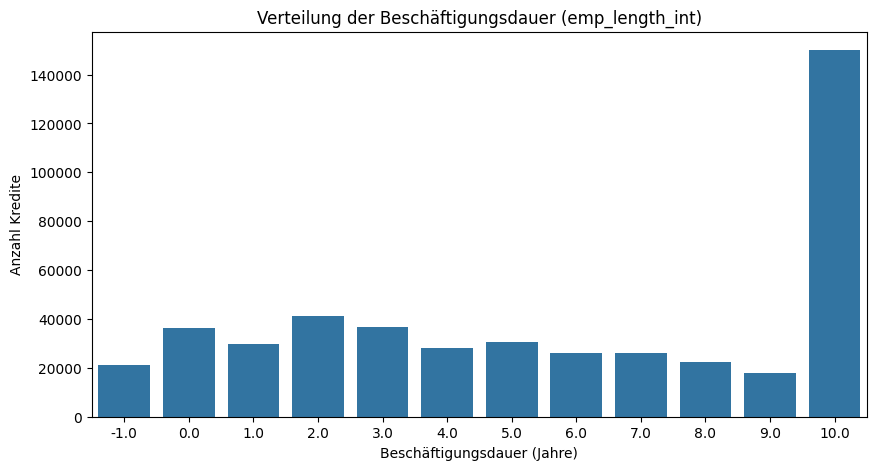

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verteilung der Beschäftigungsdauer anzeigen
plt.figure(figsize=(10, 5))
sns.countplot(data=clean_loan_data, x='emp_length_int', order=sorted(clean_loan_data['emp_length_int'].unique()))
plt.title("Verteilung der Beschäftigungsdauer (emp_length_int)")
plt.xlabel("Beschäftigungsdauer (Jahre)")
plt.ylabel("Anzahl Kredite")
plt.show()

In [ ]:
# Beispiel: Zusammenhang zwischen fehlenden Werten und loan_status
clean_loan_data['emp_length_missing'] = loan_data['emp_length'].isnull().astype(int)
print(pd.crosstab(clean_loan_data['emp_length_missing'], clean_loan_data['loan_status'], normalize='index'))

loan_status         Charged Off   Current   Default  Does not meet the credit policy. Status:Charged Off  Does not meet the credit policy. Status:Fully Paid  Fully Paid  In Grace Period  Late (16-30 days)  Late (31-120 days)
emp_length_missing                                                                                                                                                                                                              
0                      0.090175  0.477332  0.001761                                           0.001675                                             0.004422     0.400623         0.006836           0.002580            0.014595
1                      0.110529  0.556026  0.002285                                           0.000714                                             0.000904     0.302313         0.004855           0.003284            0.019088


**Feature-Engineering für term**: Anzahl der Zahlungen für den Kredit (36 oder 60 Monate).

1. Die Feature muss in die richtige Format und Datentyp. ich ersetze einen String('months') aus einer Variable durch einen anderen String, in diesem Fall durch einen leeren String.

2. ich extrahiert das Datum  aus einer Zeichenfolgenvariablen in einem bestimmten Format..

In [ ]:
# months muss bearbeiten werden
clean_loan_data['term'].head()

,term
0,36 months
1,60 months
2,36 months
3,36 months
4,60 months


In [ ]:
# alternativ
#clean_df['term'] = clean_df['term'].apply(lambda x: int(x[1:3]))
#clean_df['term'].unique(), clean_df.term.dtype

In [ ]:
# Wir ersetzen eine Zeichenfolge durch eine andere Zeichenfolge, in diesem Fall durch eine leere Zeichenfolge (also durch nichts).
clean_loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [ ]:
# Wir ersetzen einen String aus einer Variable durch einen anderen String, in diesem Fall durch einen leeren String
# Wir konvertieren das Ergebnis in einen numerischen Datentyp und speichern es in einer anderen Variable.
clean_loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
type(clean_loan_data['term_int'][0])

numpy.int64

In [ ]:
# Richtige Format
clean_loan_data['term_int'].head()

,term_int
0,36
1,60
2,36
3,36
4,60


**Feature Engineering für earliest_cr_line**

Die Variable earliest_cr_line gibt das Datum der ersten jemals eröffneten Kreditlinie eines Kunden an (z. B. 'Jan-85'). Um diese Information für ein Risikomodell nutzbar zu machen, wurde sie in eine numerische Variable umgewandelt, die die Dauer der Kredithistorie in Monaten beschreibt – gemessen vom Eröffnungsdatum bis zu einem festgelegten Referenzzeitpunkt (2017-12-01).

1. **Konvertierung des Datumsformats**
Zunächst wurde der String earliest_cr_line (z. B. 'Jan-85') in ein valides Datum umgewandelt (1985-01-01). Dabei wurde beachtet, dass Python bei zweistelligen Jahresangaben standardmäßig Jahre ≤ 68 als 2000er und ≥ 69 als 1900er Jahre interpretiert.

2. **Korrektur fehlerhafter Jahrhundert-Zuordnungen**
Einige Daten wurden fälschlicherweise ins 21. Jahrhundert eingeordnet (z. B. 'Jan-50' → 2050-01-01). Da der Referenzzeitpunkt im Jahr 2017 liegt, sind solche Werte offensichtlich fehlerhaft. Alle Zeitpunkte, die nach dem Referenzdatum liegen, wurden daher um 100 Jahre zurückdatiert, um die realistische Kreditaufnahmehistorie korrekt abzubilden.

3. **Berechnung der Kredithistorie in Monaten**
Die Anzahl der Monate zwischen earliest_cr_line und dem Referenzzeitpunkt wurde wie folgt berechnet:

Monatsdifferenz = (Jahresdifferenz * 12) + Monatsdifferenz
Beispiel: 1985-01-01 → (2017 - 1985) * 12 + (12 - 1) = 395 Monate

Diese neue Variable heißt months_since_earliest_cr_line.

4.  **Warum ist das wichtig?**
Eine längere Kredithistorie kann ein starkes Signal für ein niedrigeres Ausfallrisiko (PD) sein, da:

  - Der Kunde bereits über viele Jahre hinweg erfolgreich Kredite bedient hat.

 - Mehr historische Informationen vorliegen, wodurch die Bonitätsbewertung zuverlässiger wird.

5. **Plausibilitätsprüfung & Behandlung von Ausreißern**
Bei der Überprüfung traten einige extrem hohe Werte auf (z. B. 887 Monate ≈ 73,9 Jahre), was auf fehlerhafte Daten hindeutet – insbesondere, da Lending Club erst ab 2006 Kredite vergibt. Solche Werte wurden als nicht plausibel eingestuft.

6.  **Lösung: Begrenzung extremer Werte**
Um das Modell vor Verzerrungen durch fehlerhafte Extremwerte zu schützen, wurde eine Obergrenze von 580 Monaten (ca. 48 Jahre) definiert. Mithilfe der Methode .clip(upper=580) wurden alle höheren Werte auf diesen Grenzwert reduziert – eine gängige Technik, um Ausreißer zu behandeln, ohne valide Datenpunkte zu verlieren.

In [ ]:
# Monaten müssem bearbeiten werden und datatype check
clean_loan_data['earliest_cr_line'].head() ,type(loan_data['earliest_cr_line'][0])

(0    Jan-85
 1    Apr-99
 2    Nov-01
 3    Feb-96
 4    Jan-96
 Name: earliest_cr_line, dtype: object,
 str)

In [ ]:
# Extrahiert das Datum  aus einer Zeichenfolgenvariablen in einem bestimmten Format.
clean_loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')


In [ ]:
# Fehlende Werte prüfen
print("Fehlende Werte:",clean_loan_data['earliest_cr_line_date'].isnull().sum())

Fehlende Werte: 29


In [ ]:
clean_loan_data['earliest_cr_line_date'].head()

,earliest_cr_line_date
0,1985-01-01
1,1999-04-01
2,2001-11-01
3,1996-02-01
4,1996-01-01


In [ ]:
# Überprüft den Datentyp eines einzelnen Elements einer Spalte.
type(clean_loan_data['earliest_cr_line_date'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Das Ergebnis ist die Anzahl der Tage zwischen dem Zeitpunkt der ältesten Kreditlinie und Dezember 2017.
pd.to_datetime('2017-12-01') - clean_loan_data['earliest_cr_line_date'].head()


,earliest_cr_line_date
0,12022 days
1,6819 days
2,5874 days
3,7974 days
4,8005 days


In [ ]:
# Korrektur des Jahrhunderts (falls 'Jan-85' als 2085 statt 1985 geparst wird)
#clean_loan_data['earliest_cr_line_date'] = clean_loan_data['earliest_cr_line_date'].apply(
    #lambda x: x - pd.DateOffset(years=100) if pd.notnull(x) and x.year > 2000 else x)

In [ ]:
# Nehmen wir an, wir befinden uns jetzt im Dezember 2017
# Wir berechnen die Differenz zwischen zwei Daten in Monaten, wandeln sie in einen numerischen Datentyp um und runden sie.
# Wir speichern das Ergebnis in einer neuen Variable.
# Referenzdatum festlegen (z. B. '2017-12-01')
reference_date = pd.to_datetime('2017-12-01')

In [ ]:
# Monatsdifferenz manuell berechnen
# clean_loan_data['months_since_earliest_cr_line'] = (
#     (reference_date.year - clean_loan_data['earliest_cr_line_date'].dt.year) * 12  # Differenz in Jahren * 12
#     + (reference_date.month - clean_loan_data['earliest_cr_line_date'].dt.month)    # Differenz in Monaten
# )

In [ ]:
# Prüfen des Ergebnisses
#print(clean_loan_data[['earliest_cr_line', 'months_since_earliest_cr_line']].head())

In [ ]:
#clean_loan_data['months_since_earliest_cr_line'].describe()

In [ ]:
#clean_loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][clean_loan_data['months_since_earliest_cr_line'] < 0]

In [ ]:
# Testdaten
# test_dates = pd.Series([
#     pd.to_datetime('Jan-85', format='%b-%y'),  # Wird als 2085-01-01 geparst
#     pd.to_datetime('Dec-15', format='%b-%y'),  # Wird als 2015-12-01 geparst
#     pd.NaT  # Fehlender Wert
# ])

# # Korrektur anwenden
# test_dates_corrected = np.where(
#     test_dates.dt.year > 2023,
#     test_dates - pd.DateOffset(years=100),
#     test_dates
# )

#print(test_dates_corrected)

In [ ]:

# 1. Umwandlung in datetime (Jan-85 → 2085-01-01)
clean_loan_data['earliest_cr_line_date'] = pd.to_datetime(
    loan_data['earliest_cr_line'],
    format='%b-%y',
    errors='coerce'
)

# 2. Korrektur NUR für Daten, die NACH dem Referenzdatum (2017) liegen
reference_date = pd.to_datetime('2017-12-01')
clean_loan_data['earliest_cr_line_date'] = clean_loan_data['earliest_cr_line_date'].apply(
    lambda x: x - pd.DateOffset(years=100) if pd.notnull(x) and x > reference_date else x
)

# 3. Monatsdifferenz berechnen (wie zuvor)
clean_loan_data['months_since_earliest_cr_line'] = (
    (reference_date.year - clean_loan_data['earliest_cr_line_date'].dt.year) * 12
    + (reference_date.month - clean_loan_data['earliest_cr_line_date'].dt.month)
)

# Ergebnis prüfen
print(clean_loan_data[['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']].head())

  earliest_cr_line earliest_cr_line_date  months_since_earliest_cr_line
0           Jan-85            1985-01-01                          395.0
1           Apr-99            1999-04-01                          224.0
2           Nov-01            2001-11-01                          193.0
3           Feb-96            1996-02-01                          262.0
4           Jan-96            1996-01-01                          263.0


**Plausibilitätsprüfung:**
- months_since_earliest_cr_line
Bei der Überprüfung der Variable months_since_earliest_cr_line wurden physikalisch nicht plausible Werte festgestellt – z. B. 887 Monate, was etwa 73,9 Jahre entspricht. Solche Werte implizieren eine erste Kreditaufnahme bereits um das Jahr 1944 (bei Datenstand 2017).

- **Dies ist jedoch unrealistisch, da Lending Club erst im Jahr 2006 gegründet wurde.**
Die Ursache liegt höchstwahrscheinlich in fehlerhaften **Jahrhundert-Zuordnungen bei der Umwandlung von Datumsangaben (z. B. wurde "Jan-50" fälschlich als 2050 statt 1950 interpretiert).**

In [ ]:
# Die Spalte months_since_earliest_cr_line enthielt physikalisch unmögliche Werte
# (z. B. 887 Monate ≈ 74 Jahre), die auf fehlerhafte Jahrhundertzuordnungen zurückzuführen
# waren (z. B. Jan-50 → 2050 statt 1950). Diese Werte widersprechen:
# Maximalwert (887 Monate ≈ 73.9 Jahre):
# Die ERgebnisse entspricht einer ersten Krediteröffnung um 1944 (2017 - 73.9).
# Problem: Lending Club wurde erst 2006 gegründet – Werte vor ~2000
# sind wahrscheinlich Fehler durch falsche Jahrhundert-Zuordnung (z. B. Jan-50 → 2050 statt 1950).
clean_loan_data['months_since_earliest_cr_line'].describe()

,months_since_earliest_cr_line
count,466256.000000
mean,242.491078
std,86.928944
min,73.000000
25%,184.000000
50%,226.000000
75%,285.000000
max,887.000000


**Behandlung von Ausreißern:**

- months_since_earliest_cr_line
Im Rahmen der Datenbereinigung wurde die Variable months_since_earliest_cr_line auf ihre Plausibilität geprüft. Dabei traten Werte von über **880 Monaten (≈ 74 Jahre)** auf – was auf den ersten Blick unrealistisch erscheint, da Lending Club erst **2006 gegründet wurde**. Solche Extremwerte deuten auf fehlerhafte Jahrhundertzuordnungen hin (z. B. Jan-50 → 2050 statt 1950).

- Um diese Ausreißer nicht vollständig zu entfernen, sondern nur sinnvoll einzugrenzen, wurde eine**Obergrenze von 580 Monaten (≈ 48 Jahre) definiert.** **Mithilfe der Methode .clip(upper=580)** wurden lediglich Werte oberhalb dieser Grenze auf 580 Monate begrenzt.
Diese Form des "Winsorizing" stellt sicher, dass das Modell nicht durch fehlerhafte Extremwerte verzerrt wird, während gleichzeitig möglichst viele valide Datenpunkte erhalten bleiben.



In [ ]:
# auf 50 Jahre begrenzen
# Die Methode .clip(upper=580) begrenzt nur die Werte,
# die über 600 Monate (50 Jahre) liegen, auf genau 600.
# Die ursprünglichen Daten bleiben erhalten, aber Extremwerte werden "gestutzt".
clean_loan_data['months_since_earliest_cr_line'] = clean_loan_data['months_since_earliest_cr_line'].clip(upper=580)

# Verteilung nach Bereinigung prüfen
clean_loan_data['months_since_earliest_cr_line'].describe()



,months_since_earliest_cr_line
count,466256.000000
mean,242.365840
std,86.383225
min,73.000000
25%,184.000000
50%,226.000000
75%,285.000000
max,580.000000


Diese Maßnahme verbessert die Modellstabilität und sorgt für realistischere Vorhersagen, insbesondere bei zeitbezogenen Kreditmerkmalen.

In [ ]:
# Fehlende Werte prüfen
print("Fehlende Werte:",clean_loan_data['earliest_cr_line_date'].isnull().sum())
# Ersetze NaN durch "unknown"
# clean_loan_data['emp_length_filled'] = loan_data['emp_length'].fillna(242)


Fehlende Werte: 29


**Feature Engineering für issue_d:** Monat, in dem der Kredit finanziert wurde.

1. **Konvertierung in ein Datumsformat:** Um die zeitliche Dimension der Kreditausgabe für das Risikomodell nutzbar zu machen, wurde das Feature issue_d – ursprünglich ein String im Format "%b-%y" (z. B. "Jan-15") – Der ursprüngliche String wird in ein standardisiertes Datum umgewandelt, um ihn für Berechnungen nutzbar zu machen.

2. **Berechnung der vergangenen Monate seit Kreditausgabe:**
Hier wird die Anzahl der Monate zwischen der Kreditausgabe und dem Referenzdatum (Dezember 2017) berechnet. Das Feature mths_since_issue_d repräsentiert also, wie alt der jeweilige Kredit zum Stichtag ist. Diese Variable kann wichtige Informationen liefern, z. B.:

    - Wie lange ein Kredit bereits läuft (relevant für Rückzahlungs- oder Ausfallanalysen)

    - In welchem Zeitraum des Kreditportfolios sich bestimmte Muster (z. B. Ausfälle) häufen


In [ ]:
# Wir gehen davon aus, dass wir uns im Dezember 2017 befinden
# Extrahiert das Datum aus einer Zeichenkette, die in einem bestimmten Format vorliegt
clean_loan_data['issue_d_date'] = pd.to_datetime(clean_loan_data['issue_d'], format = '%b-%y')

# Wir berechnen die Differenz zwischen zwei Daten in Monaten, konvertieren das Ergebnis in einen numerischen Datentyp und runden es.
# Das Ergebnis wird in einer neuen Variable gespeichert.
clean_loan_data['mths_since_issue_d'] = (
    (reference_date - clean_loan_data['issue_d_date'])
    / np.timedelta64(1, 'D')  # Differenz in Tagen
    / 30.44                   # Durchschnittliche Tage pro Monat (Approximation)
    ).round().astype(int)

# Shows some descriptive statisics for the values of a column.
clean_loan_data['mths_since_issue_d'].describe()


,mths_since_issue_d
count,466285.000000
mean,51.255187
std,14.340154
min,36.000000
25%,41.000000
50%,47.000000
75%,57.000000
max,126.000000


In [ ]:
print("Ältester Kredit:", clean_loan_data['issue_d_date'].min())
print("Neuester Kredit:", clean_loan_data['issue_d_date'].max())

Ältester Kredit: 2007-06-01 00:00:00
Neuester Kredit: 2014-12-01 00:00:00


In [ ]:
print(clean_loan_data['issue_d_date'].isnull().sum())

0


In [ ]:
#loan_data.id.count()

In [ ]:
#loan_data

In [ ]:
# import pandas as pd
# import numpy as np

# # Annahme: loan_data ist Ihr DataFrame
# loan_data = pd.DataFrame({
#     'emp_length': ['10+ years', '< 1 year', '3 years', np.nan, '5 years', np.nan, '2 years']
# })

# # 1. Ersetze NaN durch "unknown"
# loan_data['emp_length_filled'] = loan_data['emp_length'].fillna('unknown')

# # 2. Zeige die Verteilung der Kategorien
# print("Kategorien nach Ersetzung:\n", loan_data['emp_length_filled'].value_counts())

# # 3. One-Hot-Encoding durchführen (für kategorische Behandlung)
# emp_length_dummies = pd.get_dummies(
#     loan_data['emp_length_filled'],
#     prefix='emp_length'
# )

# # 4. Original-Daten mit den Dummy-Variablen kombinieren
# loan_data = pd.concat([loan_data, emp_length_dummies], axis=1)

# # Ergebnis anzeigen
# print(loan_data[['emp_length', 'emp_length_filled'] + list(emp_length_dummies.columns)])

### **Vorverarbeitung diskreter Variablen**


Vorverarbeitung diskreter Variablen
Im Rahmen der Datenvorbereitung werden wir mehrere kategoriale (diskrete) Variablen für die Modellierung aufbereiten. Dazu gehören unter anderem: Klasse (grade), Unterklasse (sub_grade), Eigenheimbesitz (home_ownership), Überprüfungsstatus (verification_status), Kreditstatus (loan_status), Verwendungszweck (purpose), Adressstatus (addr_state) sowie der anfängliche Listenstatus (initial_list_status).

Da sich die Unterklasse stark mit der Klasse überschneidet und bereits in dieser enthalten ist, werden wir die sub_grade-Variable voraussichtlich nicht separat verwenden, um Redundanzen zu vermeiden.

Je nach Art und Informationsgehalt der Variablen wenden wir unterschiedliche Kodierungsverfahren an:

- Ordinal-Codierung bei Variablen mit natürlicher Rangfolge (z. B. grade).

- One-Hot-Encoding bei nominalen Variablen ohne Rangfolge (z. B. purpose, home_ownership, addr_state), um sie für maschinelle Lernmodelle nutzbar zu machen.

In [ ]:
# Displays Spaltennamen, vollständige (nicht fehlende) Fälle pro Spalte und Datentyp pro Spalte.
# clean_loan_data.info()


In [ ]:
# Erstelle Dummy-Variablen aus einer Variablen.
pd.get_dummies(clean_loan_data['grade'])

In [ ]:
 # Erstelle Dummy-Variablen aus einer Variablen. (gleiche Bedeutung wie oben)
pd.get_dummies(clean_loan_data['grade'], prefix = 'grade', prefix_sep = ':')


In [ ]:
#  Wir erstellen Dummy-Variablen aus allen 8 ursprünglichen unabhängigen Variablen und speichern sie in einer Liste.
# Beachte, dass wir eine bestimmte Namenskonvention für alle Variablen verwenden: ursprünglicher Variablenname, Doppelpunkt, Kategoriename.
loan_data_dummies = [pd.get_dummies(clean_loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(clean_loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(clean_loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(clean_loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(clean_loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(clean_loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(clean_loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(clean_loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]


In [ ]:
 # Wir fügen die Dummy-Variablen zusammen (konkatenieren sie), wodurch ein DataFrame entsteht.
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)


In [ ]:
loan_data_dummies.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3',
       'sub_grade:A4', 'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2',
       'sub_grade:B3', 'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1',
       'sub_grade:C2', 'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5',
       'sub_grade:D1', 'sub_grade:D2', 'sub_grade:D3', 'sub_grade:D4',
       'sub_grade:D5', 'sub_grade:E1', 'sub_grade:E2', 'sub_grade:E3',
       'sub_grade:E4', 'sub_grade:E5', 'sub_grade:F1', 'sub_grade:F2',
       'sub_grade:F3', 'sub_grade:F4', 'sub_grade:F5', 'sub_grade:G1',
       'sub_grade:G2', 'sub_grade:G3', 'sub_grade:G4', 'sub_grade:G5',
       'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'lo

In [ ]:
# Gibt den Typ der Variablen zurück.
print(type(loan_data_dummies))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Verkettet zwei Dataframes.
# Hier verketten wir den Dataframe mit den Originaldaten mit dem Dataframe mit Dummy-Variablen entlang der Spalten.
clean_loan_data = pd.concat([clean_loan_data, loan_data_dummies], axis = 1)


#### **Umgang mit fehlenden Werten bei total_rev_hi_lim**
Die Variable total_rev_hi_lim steht für den Gesamtkreditrahmen bei revolvierenden Krediten (z. B. Kreditkarten). In Fällen, in denen dieser Wert fehlt, wurde beobachtet, dass er häufig dem Betrag entspricht, der tatsächlich finanziert wurde (funded_amnt).

Daher ist es plausibel, fehlende Werte von total_rev_hi_lim mit den entsprechenden Werten aus funded_amnt zu ersetzen. Dies stellt sicher, dass keine wertvollen Beobachtungen verloren gehen und gleichzeitig eine sinnvolle Annäherung auf Basis der vorhandenen Daten erfolgt.


In [ ]:
# Fehlende Werte in total_rev_hi_lim mit funded_amnt ersetzen
clean_loan_data['total_rev_hi_lim'].fillna(clean_loan_data['funded_amnt'], inplace=True)


Diese Imputation basiert auf einem fachlich begründeten Zusammenhang zwischen den beiden Variablen und reduziert die Gefahr, durch einfache Mittelwert- oder Medianersetzung Verzerrungen im Modell zu erzeugen.

In [ ]:
# Displays all column names.
clean_loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Zielordner definieren
folder_path = '/content/drive/MyDrive/Lending-Club-Credit-Scoring/notebooks'
os.makedirs(folder_path, exist_ok=True)  # erstellt Ordner, falls nicht vorhanden

# Datei als Parquet speichern
file_path = f'{folder_path}/clean_loan_data.parquet'
clean_loan_data.to_parquet(file_path, index=False)

print(f'Datei gespeichert unter: {file_path}')


Datei gespeichert unter: /content/drive/MyDrive/Lending-Club-Credit-Scoring/notebooks/clean_loan_data.parquet


In [ ]:
import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/Lending-Club-Credit-Scoring/notebooks/clean_loan_data.parquet')


### 1.8 Fazit
Wir verfügen nun über einen bereinigten Datensatz, der bereit ist für die explorative Datenanalyse und das Modellieren. Die in diesem Notebook durchgeführten Schritte lassen sich wie folgt zusammenfassen:

- Entfernung von Merkmalen mit mehr als 70 % fehlenden Werten

- Entfernung von Merkmalen mit zu hoher Kardinalität (zu viele einzigartige Kategorien)

- Entfernung von Merkmalen mit einem eindeutigen Wert pro Beobachtung

- Entfernung von Merkmalen mit keiner Varianz bzw. konstantem Wert

- Entfernung von nicht hilfreichen Merkmalen

- Entfernung von Merkmalen, deren Information bereits in anderen enthalten ist

- Ausschluss von Merkmalen, die zum Zeitpunkt der Vorhersage nicht verfügbar sind (z. B. weil sie zukünftige Informationen enthalten → Datenleck verhindern!)

- Entfernung von Beobachtungen mit fehlenden Werten, wenn diese nur einen sehr kleinen Teil der Daten ausmachen

- Imputation von fehlenden Werten, wenn diese logisch den Wert 0 darstellen sollten

- Umwandlung von Variablen in den korrekten Datentyp (z. B. von object zu datetime oder int)

- Erstellung neuer erklärender Variablen

- Definition der Zielvariablen für:

  - PD-Modell (Probability of Default – durch Festlegung, was als "Default" gilt)

  - EAD-Modell (Exposure at Default – über den Kreditumrechnungsfaktor)

  - LGD-Modell (Loss Given Default – über die Recovery Rate)


- Identifikation und Korrektur inkonsistenter Ausreißer, basierend auf Minimum, Maximum und beschreibenden Statistiken

- Optimierung des Speichers und Export des bereinigten Datensatzes als Parquet-Datei

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
